# Potato Plant Disease Classification

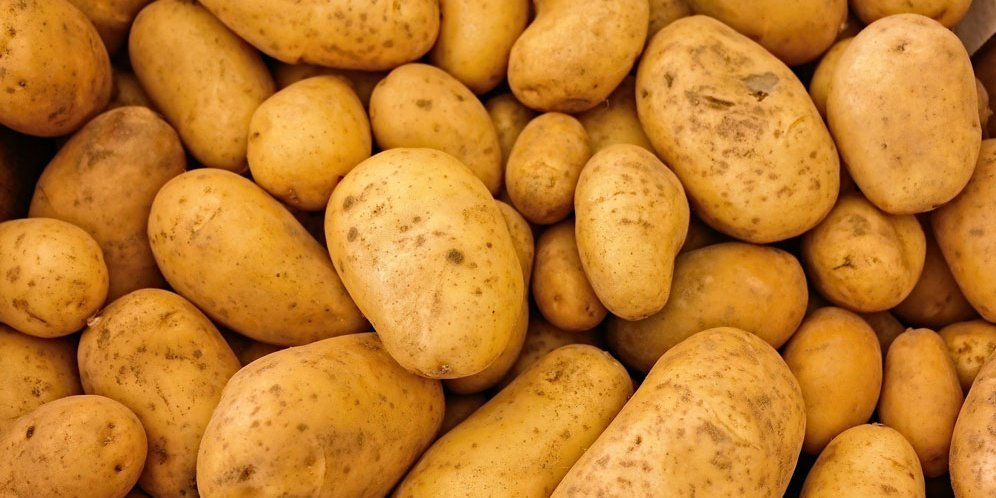

## BCC_Overwork
### Anggota:
- Alfonsus Avianto Chandrawan
- Anatasia Griselda Ferina Budiargo
- Femi Novia Lina

### Import Libraries

In [1]:
import os
import matplotlib.pyplot as plt
import splitfolders
import numpy as np
import tensorflow as tf
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator

### Data Collection
Dataset diperoleh dari website [kaggle](https://kaggle.com). Link untuk memperoleh dataset dapat diakses melalui tautan [ini](https://www.kaggle.com/code/saisravanmedicherla/plant-diesease-classification-with-inception/data). Pada kesempatan kali ini, kami hanya menggunakan dataset untuk tanaman kentang dikarenakan fokus dan tujuan aplikasi kami yaitu untuk mengklasifikasikan inputan gambar daun kentang nanti menjadi beberapa kategori sesuai dengan jenis penyakit tanaman kentang yang ada.

### Pemisahan Data Training dan Data Validation

In [2]:
splitfolders.ratio("data", output="data_splitted", seed=11, ratio=(.8, .2))

Copying files: 2152 files [00:07, 274.40 files/s]


### Exploratory Data Analysis
Tahapan ini bertujuan untuk menggali informasi terkait dataset yang akan digunakan

In [3]:
list_dir = os.listdir("data_splitted/train")

In [4]:
dic = {}
dic_dimensions = {}

for _dir in list_dir:
    path = "data_splitted/train/" + _dir
    list_file = os.listdir(path)
    dic[_dir] = len(list_file)
    dimension_list = []
    for _file in list_file:
        h,w = Image.open(os.path.join(path,_file)).size
        dimension_list.append([h,w])
    dic_dimensions[_dir] = np.unique(dimension_list, axis=0)

In [5]:
dic_dimensions

{'early_blight': array([[256, 256]]),
 'healthy': array([[256, 256]]),
 'late_blight': array([[256, 256]])}

Semua image untuk masing-masing berukuran sama yaitu **256x256**

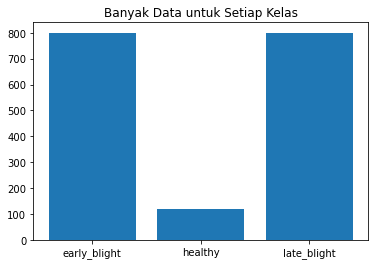

In [6]:
plt.bar(dic.keys(), dic.values())
plt.title("Banyak Data untuk Setiap Kelas")
plt.show()

Dapat ditarik kesimpulan bahwa terdapat ketidakseimbangan data.

### Data Preprocessing
Data kemudian akan dipersiapkan pada tahap ini. Masalah yang akan diselesaikan yaitu masalah ketidakseimbangan pada data

In [33]:
train_datagen = ImageDataGenerator(
        rescale=1./255)

y_col = dic.keys()

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'data_splitted/train',
        class_mode='categorical',
        target_size=(64,64))

validation_generator = test_datagen.flow_from_directory(
        'data_splitted/val',
        class_mode='categorical',
        target_size=(64,64))

Found 1721 images belonging to 3 classes.
Found 431 images belonging to 3 classes.


### Build Model

In [54]:
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=[64, 64, 3]),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [55]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [56]:
cnn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 12544)             0         
                                                                 
 dense_12 (Dense)            (None, 64)               

In [57]:
hist = cnn.fit(x = train_generator, validation_data = validation_generator, epochs = 25)

Epoch 1/25
54/54 [==============================] - 7s 121ms/step - loss: 0.6609 - accuracy: 0.7577 - val_loss: 0.4075 - val_accuracy: 0.8585
Epoch 2/25
54/54 [==============================] - 6s 116ms/step - loss: 0.3758 - accuracy: 0.8629 - val_loss: 0.2907 - val_accuracy: 0.8817
Epoch 3/25
54/54 [==============================] - 7s 124ms/step - loss: 0.2305 - accuracy: 0.9163 - val_loss: 0.4392 - val_accuracy: 0.8260
Epoch 4/25
54/54 [==============================] - 9s 161ms/step - loss: 0.1900 - accuracy: 0.9320 - val_loss: 0.1991 - val_accuracy: 0.9142
Epoch 5/25
54/54 [==============================] - 7s 131ms/step - loss: 0.1605 - accuracy: 0.9425 - val_loss: 0.1167 - val_accuracy: 0.9675
Epoch 6/25
54/54 [==============================] - 9s 162ms/step - loss: 0.0887 - accuracy: 0.9692 - val_loss: 0.1128 - val_accuracy: 0.9698
Epoch 7/25
54/54 [==============================] - 7s 133ms/step - loss: 0.0729 - accuracy: 0.9727 - val_loss: 0.1002 - val_accuracy: 0.9559
Epoch 

### Plot Loss and Accuracy

In [58]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

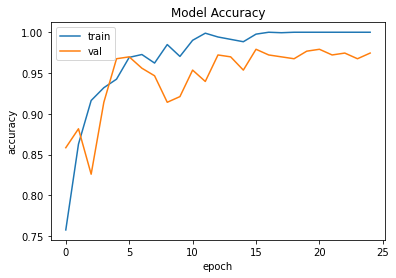

In [59]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

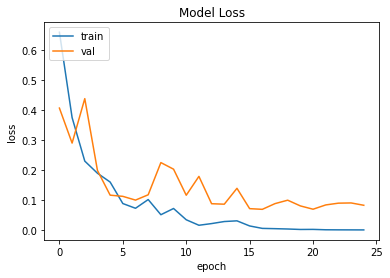

In [60]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [68]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('data_splitted/val/late_blight/0f824e18-3821-486c-81a1-f1f64cf6e767___RS_LB 4894.JPG', target_size=(64,64,3))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
class_indices = train_generator.class_indices

In [69]:
class_indices

{'early_blight': 0, 'healthy': 1, 'late_blight': 2}

In [70]:
if result[0][0] == 1:
    prediction = 'early_blight'
elif result[0][1] == 1:
    prediction = 'healthy'
else:
    prediction = 'late_blight'

In [71]:
prediction

'early_blight'

### Convert to H5 Format

In [67]:
cnn.save('model.h5')